# import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
file_dir=r"D:\HZC\Imp_ZYX_Deeplearning\EV_data.xlsx"  #your file dir
df_import = pd.read_excel(file_dir, index_col=0, sheet_name=None)
#df_import

# function

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
def split_train_test(dataframe, y_col='type_num', split_y=False, cut=['type_num','type'], test_size=0.25, random_state=42):
    'split_trainset_&_test_set'
    split = StratifiedShuffleSplit(test_size=test_size, random_state=random_state)
    for train_index, test_index in split.split(dataframe, dataframe[y_col]):
        train_set = dataframe.iloc[train_index]
        test_set = dataframe.iloc[test_index]
    if split_y == True:
        df_train_x, df_train_y = num_cut(train_set, cut)
        df_test_x, df_test_y = num_cut(test_set, cut)
        return df_train_x, df_train_y[y_col], df_test_x, df_test_y[y_col]
    elif split_y == False:
        return train_set, test_set

def num_cut(dataframe, columns):
    'split_number_&_str_type'
    data_cat = dataframe.loc[:, columns]
    data_num = dataframe.drop(columns=columns)
    return data_num, data_cat

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

def ML_result(ML, X, y, X_test, y_test):
    "input: ML algorithm. autofit, then output confusion_matrix & accuracy."
    ML.fit(X, y) #fit
    #train
    y_pred = cross_val_predict(ML, X, y, cv=3)
    confmat_train = confusion_matrix(y, y_pred)
    accu_train = accuracy_score(y, y_pred)
    impo = ML.feature_importances_
    impo_df = pd.DataFrame(sorted(zip(impo, X.columns), reverse=True)) 
    #test
    final_pred = ML.predict(X_test)
    confmat_test = confusion_matrix(y_test, final_pred) 
    accu_test = accuracy_score(y_test, final_pred)
    return {"confmat_train":confmat_train, "accu_train":accu_train, 
            'confmat_test':confmat_test, "accu_test":accu_test, 'feature_importance':impo_df}

In [110]:
def conf_mat_heatmap(conf_mat, rect_set, title, ticklabel=['A549','MCF10A','MCF7','PS'], cmap=None):
    fig = plt.figure(dpi=130, figsize=(2.5,2.5)) 
    ax1 = fig.add_subplot(111)
    density_mat = conf_mat/np.sum(conf_mat, axis=1).reshape(conf_mat.shape[0], -1)
    if cmap == None:
        cmap = sns.cubehelix_palette(start=2.75, rot=0, gamma=1, hue=2, dark=0.5, 
                                     light=1, as_cmap=True)  #return matplotlib colormap
    h = sns.heatmap(data=density_mat, xticklabels=ticklabel, yticklabels=ticklabel, annot = True, 
                    fmt=".1%", linewidths=1, linecolor="0.7", cbar=False, #turn off color bar
                    annot_kws={'size':10,'weight':600,'family':"Arial",'color':"k"}, 
                    square=True, vmin=0, vmax=1, cmap=cmap, ax=ax1)
    ax1.tick_params(width=2, length=4, colors="k")
    rect = plt.Rectangle(xy=rect_set["xy1"], width=rect_set["width1"], height=rect_set["height1"],
                         fill=False, edgecolor="k", linewidth=rect_set["linewidth1"])
    ax1.add_patch(rect)
    # color bar
    rect_cb = [1, 0.13, 0.11, 0.74]
    cbar_ax = fig.add_axes(rect_cb)
    cb = h.figure.colorbar(h.collections[0], cax=cbar_ax) #show colorbar
    cb.ax.tick_params(direction='in', labelsize=10, length=4, width=1, colors="k",
                      left=True, right=True)
    rect2 = plt.Rectangle(xy=rect_set["xy2"], width=rect_set["width2"], height=rect_set["height2"],
                         fill=False, edgecolor="k", linewidth=rect_set["linewidth2"] )
    cbar_ax.add_patch( rect2 )
    # title
    font1 = {'family':'Arial', 'color':'k', 'weight':'bold', 'size': 12}
    accu = conf_mat.trace()/conf_mat.sum()
    ax1.set_xlabel('Accuracy Score:{:.1%}'.format(accu), font1);
    ax1.set_ylabel("Actual", font1); 
    ax1.set_title(str(title)+'\n Predicted', font1);  
rect_set2={"xy1":(0.023,0.017), "width1":2.94, "height1":2.96,"linewidth1":2.2,
                    "xy2":(0.03,0.004), "width2":0.97, "height2":0.99,"linewidth2":1.1}
rect_set3={"xy1":(0.03,0.017), "width1":3.94, "height1":3.96,"linewidth1":1.5,
                    "xy2":(0.03,0.002), "width2":0.97, "height2":1,"linewidth2":1.1}

# data_visualization (delete)

In [737]:
def dataset_batch(data, n=10, norm=True, skip_mov='PS', random_state=42):
        if norm == True:
            df_normalized = MinMaxScaler((0,1)).fit_transform(data)
            df_processed = pd.DataFrame(df_normalized, columns=data.columns, index=data.index)
        else:
            df_processed = data
        data_mov = moving_avg(df_processed, n=n, skip=skip_mov, random_state=random_state)
        data_mov['type_num'] = [type_2_num[i] for i in data_mov['type']]
        df_train, df_test = split_train_test(data_mov, y_col='type_num')
        return df_train, df_test

In [740]:
a,b=dataset_batch(df_import['size'])

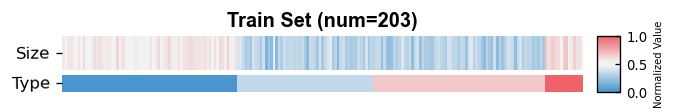

In [792]:
draw_dataset(a, figsize=(6,0.6), height_ratio=[4,2], width_ratio=[1,0.045], hspace=0.2, wspace=0.05,
             Train_Test='Train', cbar_grid=2, cbar_fontsize=6,
             legend=False, cmap_name=['div','div'], n_color=[100,4])

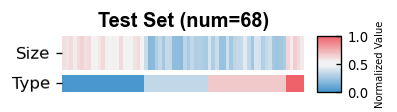

In [789]:
draw_dataset(b, figsize=(3,0.6), height_ratio=[4,2], width_ratio=[1,0.10], hspace=0.2, wspace=0.1,
             Train_Test='Test', cbar_grid=2, cbar_fontsize=6,
             legend=False, cmap_name=['div','div'], n_color=[100,4])

In [793]:
a2,b2=dataset_batch(df_import['imp'])

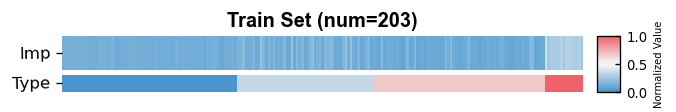

In [794]:
draw_dataset(a2, figsize=(6,0.6), height_ratio=[4,2], width_ratio=[1,0.045], hspace=0.2, wspace=0.05,
             Train_Test='Train', cbar_grid=2, cbar_fontsize=6,
             legend=False, cmap_name=['div','div'], n_color=[100,4])

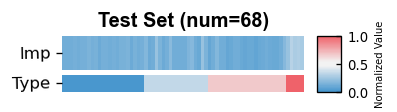

In [795]:
draw_dataset(b2, figsize=(3,0.6), height_ratio=[4,2], width_ratio=[1,0.10], hspace=0.2, wspace=0.1,
             Train_Test='Test', cbar_grid=2, cbar_fontsize=6,
             legend=False, cmap_name=['div','div'], n_color=[100,4])

In [797]:
a3,b3=dataset_batch(df_import['size+imp'])

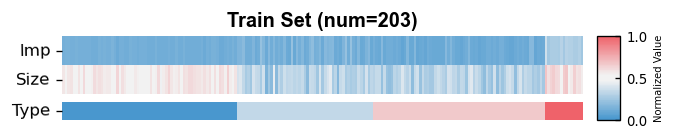

In [809]:
draw_dataset(a3, figsize=(6,0.9), height_ratio=[4,1.2], width_ratio=[1,0.045], hspace=0.2, wspace=0.05,
             Train_Test='Train', cbar_grid=2, cbar_fontsize=6,
             legend=False, cmap_name=['div','div'], n_color=[100,4])

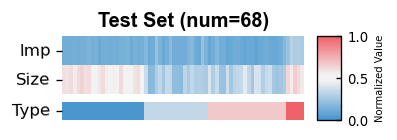

In [812]:
draw_dataset(b3, figsize=(3,0.9), height_ratio=[4,1.2], width_ratio=[1,0.10], hspace=0.2, wspace=0.1,
             Train_Test='Test', cbar_grid=2, cbar_fontsize=6,
             legend=False, cmap_name=['div','div'], n_color=[100,4])

In [813]:
a4,b4=dataset_batch(df_import['5imp'])

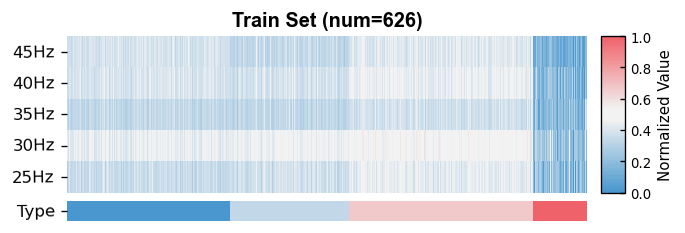

In [829]:
y_label2={'25Hz':'25Hz','35Hz':'35Hz','45Hz':'45Hz','30Hz':'30Hz','40Hz':'40Hz'}
draw_dataset(a4, figsize=(6,2), height_ratio=[4,0.5], width_ratio=[1,0.045], hspace=0.1, wspace=0.05,
             Train_Test='Train', y_label=y_label2,
             legend=False, cmap_name=['div','div'])

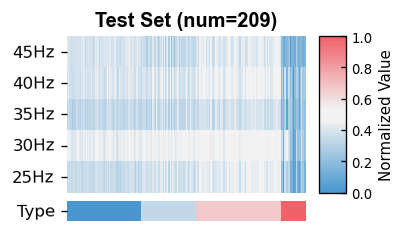

In [834]:
draw_dataset(b4, figsize=(3,2), height_ratio=[4,0.5], width_ratio=[1,0.11], hspace=0.1, wspace=0.1,
             Train_Test='Test', y_label=y_label2,
             legend=False, cmap_name=['div','div'])

In [779]:
import matplotlib.patches as mpatches
num_2_type={0:'A549', 1:'MCF10A', 2:'MCF7', 3:'PS'}
y_label = {'Imp_contrast_change':"Imp", 'Size/nm':"Size", 'CD63_contrast_change':"CD63",
         'EpCAM_contrast_change':'EpCAM', 'CD81_contrast_change':'CD81'}
def cmap_fn(name, n_color):
    if name == 'bwr':
        return sns.color_palette('bwr', n_colors=n_color)
    elif name == 'div':
        return sns.diverging_palette(240, 10, s=80, l=60, sep=20, n=n_color)
def draw_dataset(df, figsize=(6,2), height_ratio=[4,0.5], width_ratio=[1,0.05], hspace=0.1, wspace=0.1, 
                 cbar_grid=1, cbar_fontsize=9, y_label=y_label, Train_Test='Train', 
                 cmap_name=['bwr','bwr'], legend=True, n_color=[100,4], 
                 sort='type_num', type_col='type', ):
    fig = plt.figure(dpi=120, figsize=figsize)
    grid = fig.add_gridspec(2, 2, hspace=hspace, wspace=wspace, height_ratios=height_ratio, width_ratios=width_ratio)
    ax1 = plt.subplot(grid[0,0])
    ax0 = plt.subplot(grid[1,0])
    if cbar_grid == 1:
        ax2 = plt.subplot(grid[0,1])
    elif cbar_grid == 2:
        ax2 = plt.subplot(grid[:,1])
    # heatmap
    df_sort = df.sort_values(by = [sort], ascending=True)
    data = df_sort.drop(columns=[sort,type_col])
    h = sns.heatmap(data=data.T, ax=ax1, vmin=0, vmax=1, cbar=False, 
                    cmap=cmap_fn(cmap_name[0], n_color[0]))#sns.diverging_palette(240, 10, s=80, l=60, sep=20, n=100)
    sns.heatmap(data=np.array(df_sort[sort]).reshape(1,-1), #reshape array to 2D
                cmap=cmap_fn(cmap_name[1], n_color[1]),#sns.color_palette('bwr',n_colors=4), 
                ax=ax0, linewidth=0, linecolor="w", cbar=False)
    ax0.set_xlabel(None) 
    ax0.set_xticks([]);
    ax0.set_yticklabels(["Type"], rotation=1)
    # cbar
    cb = h.figure.colorbar(h.collections[0], cax=ax2)#cbar_ax
    cb.ax.tick_params(direction='in', labelsize=8, color="k", length=3, left=False, right=True)
    cb.ax.set_ylabel('Normalized Value', fontsize=cbar_fontsize)
    #set axis
    font1 = {'family':'Arial', 'color':'k', 'weight': 'bold'}
    ax1.set_title(Train_Test+" Set (num=%s)" % data.shape[0], font1);
    curr_label = [y_label[item.get_text()] for item in ax1.get_yticklabels()]
    ax1.set_yticklabels(curr_label, rotation=1)
    ax1.set_xlabel(None) 
    ax1.set_xticks([]);
    if legend == True:
        col_map = cmap_fn(cmap_name[1], n_color[1])#sns.color_palette('bwr',n_colors=4, as_cmap=False)
        handles = []
        for i in range(len(df[sort].unique())):
            temp = mpatches.Patch(color=col_map[i], label=num_2_type[i])
            handles.append(temp)
        ax0.legend(handles=handles, bbox_to_anchor=(0,0), #bbox_transform=plt.gcf().transFigure, #from Axes to Figure
                   columnspacing=1, loc='upper left', ncol=4, fontsize=8, frameon=False) #columnspacing: space between patch and label

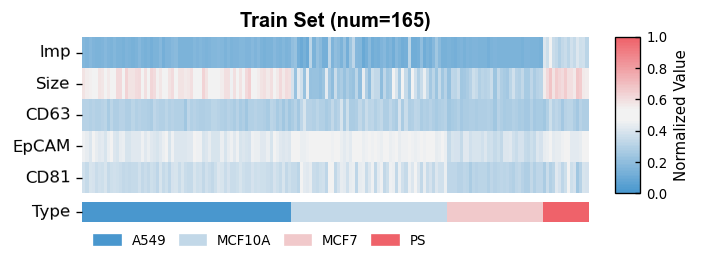

In [796]:
draw_dataset(df_train, figsize=(6,2), Train_Test='Train', legend=True, cmap_name=['div','div'], n_color=[100,4])

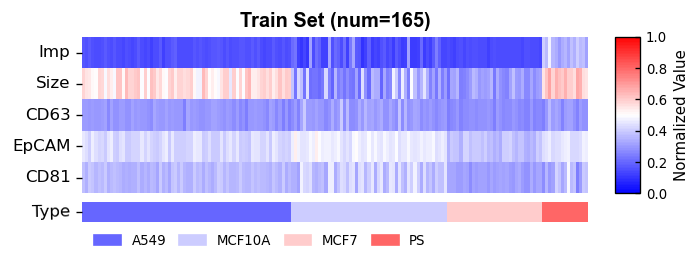

In [671]:
draw_dataset(df_train, figsize=(6,2), Train_Test='Train', legend=True, cmap_name=['bwr','bwr'], n_color=[100,4])

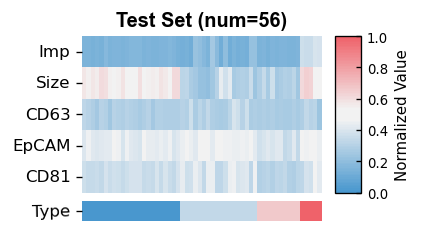

In [670]:
draw_dataset(df_test, figsize=(3,2), width_ratio=[1,0.11], Train_Test='Test', legend=False, cmap_name=['div','div'], n_color=[100,4])

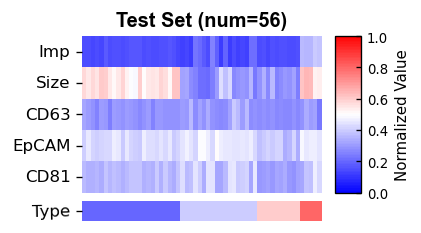

In [656]:
draw_dataset(df_test, figsize=(3,2), width_ratio=[1,0.11], Train_Test='Test', legend=False, cmap_name=['div','div'], n_color=[100,4])

# moving_average with RF

In [10]:
def moving_avg(df, n=10, skip='PS', random_state=42):
    df['type'] = [i.split('_')[0] for i in df.index] 
    temp=pd.DataFrame()
    if skip != None:
        temp = df.query('type == @skip').copy(deep=True)       
    df_drop = df.drop(index=df[df['type']=='PS'].index)
    df_moving_avg = pd.DataFrame()
    for i in df_drop['type'].unique():
        df_i = df_drop.query('type == @i').drop(columns=['type'])
        df_i_shuffle = df_i.sample(frac=1, random_state=random_state, 
                                   axis=0) #randomly take frac% from all; axis=0, row;
        j=0
        while j+n <= len(df_i_shuffle):
            df_mean = pd.DataFrame(df_i_shuffle.iloc[j:j+n,:].mean()).T
            df_mean['type'] = i
            df_moving_avg = pd.concat([df_moving_avg, df_mean])
            j += 1
    df_moving_avg = pd.concat([df_moving_avg, temp])
    return df_moving_avg

In [8]:
from sklearn.preprocessing import MinMaxScaler
type_2_num={'A549':0, 'MCF10A':1, 'MCF7':2, 'PS':3}
def find_best_n(data_dict, n_range, skip_mov='PS', skip_norm='5imp', random_state=42):
    accu_train = pd.DataFrame(np.zeros([len(n_range),len(data_dict)]), index = n_range, 
                              columns = data_dict.keys()) #empty, accuracy of train set
    accu_test = pd.DataFrame(np.zeros([len(n_range),len(data_dict)]), index = n_range, 
                              columns = data_dict.keys()) #accuracy of test set
    result = {}
    for key in data_dict:
        result_n = []
        if key != skip_norm:
            df_normalized = MinMaxScaler((0,1)).fit_transform(data_dict[key])
            df_processed = pd.DataFrame(df_normalized, columns=data_dict[key].columns, 
                                        index=data_dict[key].index)
        else:
                df_processed = data_dict[key]
        for n in n_range:
            data_mov = moving_avg(df_processed, n=n, skip=skip_mov, random_state=random_state)
            data_mov['type_num'] = [type_2_num[i] for i in data_mov['type']]
            df_train_x, df_train_y, df_test_x, df_test_y = split_train_test(data_mov, y_col='type_num', split_y=True)
            forest_clf = RandomForestClassifier(n_jobs=-1, random_state=random_state, n_estimators=100)
            clf_result = ML_result(forest_clf, df_train_x, df_train_y, df_test_x, df_test_y)
            result_n += [clf_result]
            accu_train.loc[n, key] = clf_result["accu_train"]
            accu_test.loc[n, key] = clf_result["accu_test"]
        result[key] = result_n
    return result, accu_train, accu_test

In [111]:
result, accu_train, accu_test = find_best_n(df_import, n_range=range(1,21))

In [116]:
accu_test.to_excel(r'D:\HZC\Imp_ZYX_Deeplearning\Result\moving_avg_RF_accu_test_with0508data.xlsx')

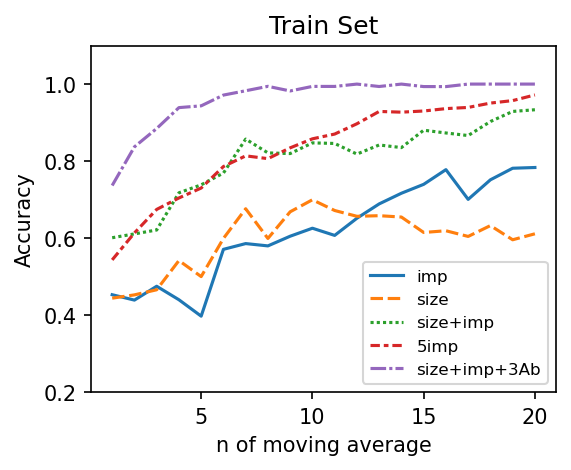

In [113]:
fig, ax1 = plt.subplots(figsize=(4,3), dpi=150)#
sns.lineplot(accu_train)
ax1.set_ylabel('Accuracy',) 
ax1.set_xlabel('n of moving average',)
plt.ylim([0.2,1.1])
plt.title('Train Set');
plt.legend(fontsize=8, frameon=True)

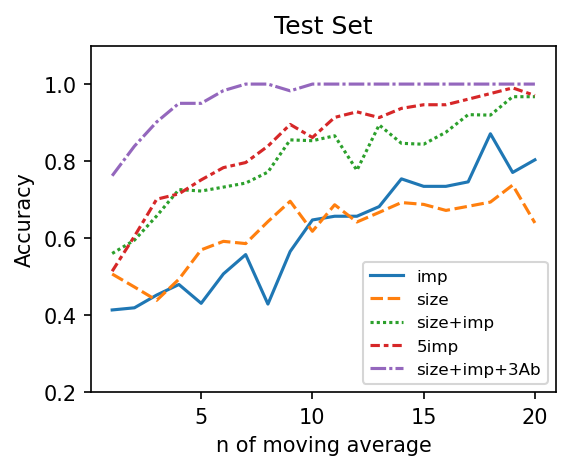

In [114]:
fig, ax1 = plt.subplots(figsize=(4,3), dpi=150)#
sns.lineplot(accu_test)
ax1.set_ylabel('Accuracy',) #fontweight="bold"
ax1.set_xlabel('n of moving average',)#fontweight="bold"
plt.ylim([0.2,1.1])
plt.title('Test Set');
plt.legend(fontsize=8, frameon=True)

In [404]:
item_list = {'Train Set':'confmat_train', 'Test Set':'confmat_test'}
def draw_selected_confmat(result, n=10, name=['Train Set'], impo=False, rect_set=rect_set3,
                          tick_label=['A549','MCF10A','MCF7','PS']):  
    for key in result:
        for item in name:
            conf_mat_heatmap(result[key][n][item_list[item]], rect_set=rect_set, 
                             title=item, ticklabel=tick_label)
        if impo==True:
            draw_impo(result[key][n]['feature_importance'], )

In [406]:
def draw_impo(impo_df):
    fig, ax1 = plt.subplots(figsize=(4,3), dpi=150)
    ax1.bar(x=impo_df[1], height=impo_df[0], edgecolor='coral', color='orange', linewidth=2, width=0.4)
    ax1.set_ylabel('Relative Importance')
    ax1.set_xlabel('Attribution')
    plt.xticks(rotation=60);

In [575]:
df_normalized = MinMaxScaler((0,1)).fit_transform(df_import['size+imp+3Ab'])
df_processed = pd.DataFrame(df_normalized, columns=df_import['size+imp+3Ab'].columns, 
                                        index=df_import['size+imp+3Ab'].index)
data_mov = moving_avg(df_processed, n=10, skip='PS', random_state=42)
data_mov['type_num'] = [type_2_num[i] for i in data_mov['type']]
df_train_x, df_train_y, df_test_x, df_test_y = split_train_test(data_mov, y_col='type_num', split_y=True)
forest_clf = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=100)
clf_result = ML_result(forest_clf, df_train_x, df_train_y, df_test_x, df_test_y)

In [576]:
clf_result

{'confmat_train': array([[67,  1,  0,  0],
        [ 3, 47,  1,  0],
        [ 0,  0, 31,  0],
        [ 0,  0,  0, 15]], dtype=int64),
 'accu_train': 0.9696969696969697,
 'confmat_test': array([[23,  0,  0,  0],
        [ 0, 18,  0,  0],
        [ 0,  0, 10,  0],
        [ 0,  0,  0,  5]], dtype=int64),
 'accu_test': 1.0,
 'feature_importance':           0                      1
 0  0.403587                Size/nm
 1  0.223791   CD81_contrast_change
 2  0.177366  EpCAM_contrast_change
 3  0.171654    Imp_contrast_change
 4  0.023601   CD63_contrast_change}

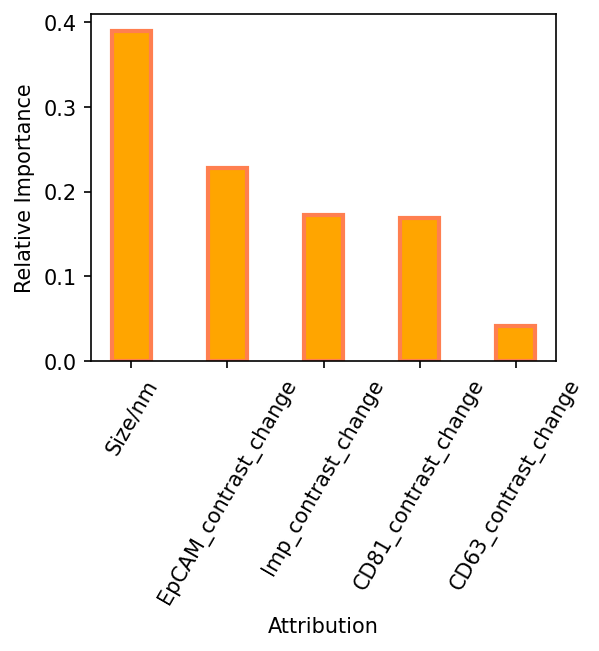

In [410]:
draw_impo(clf_result['feature_importance'])

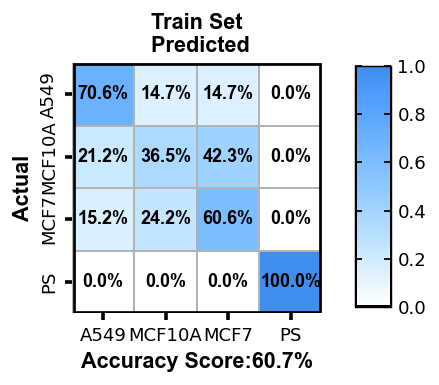

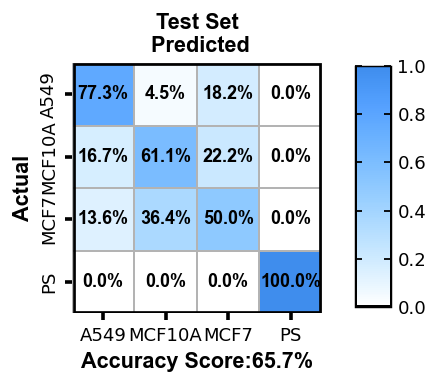

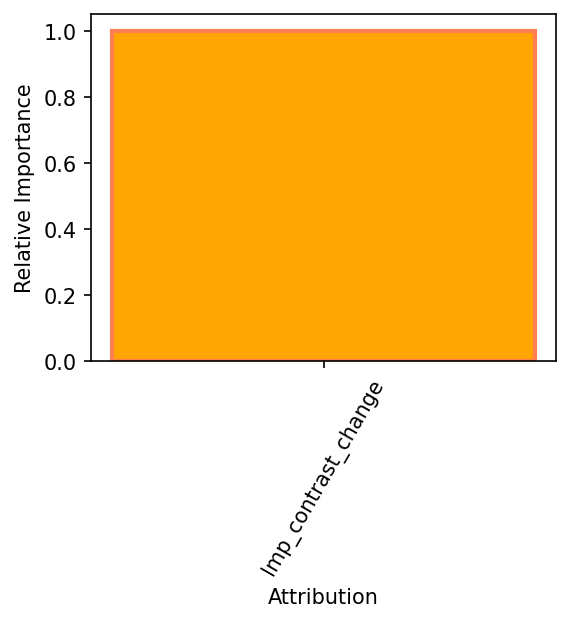

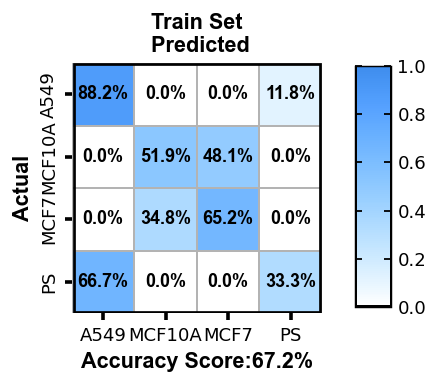

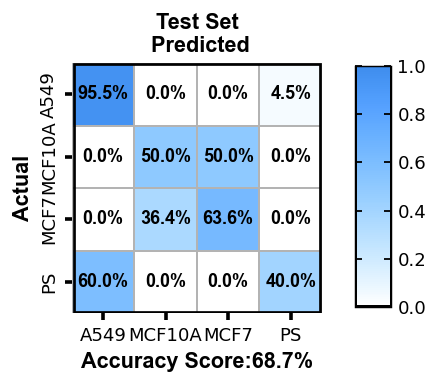

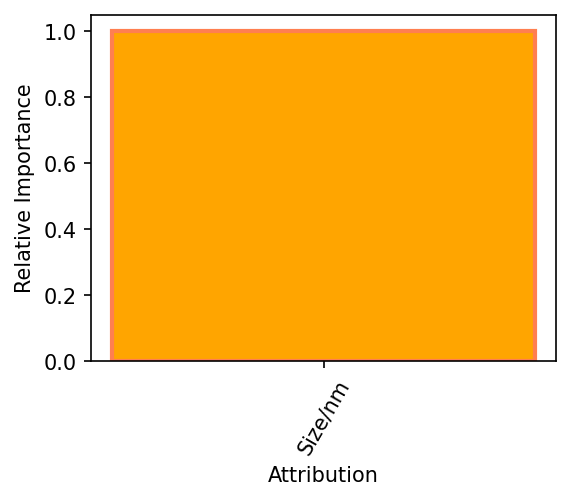

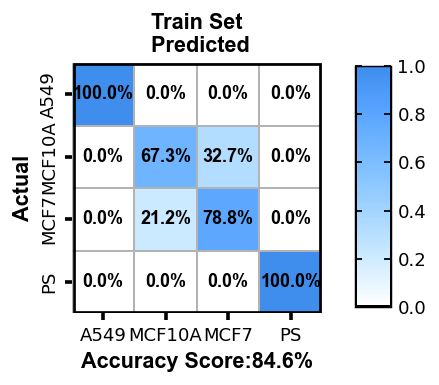

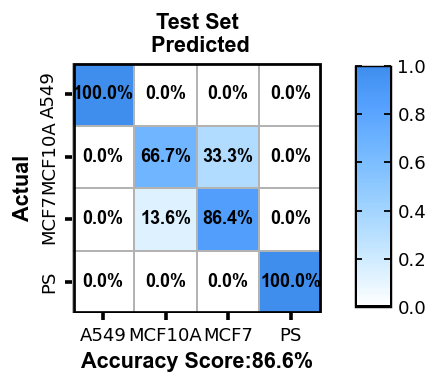

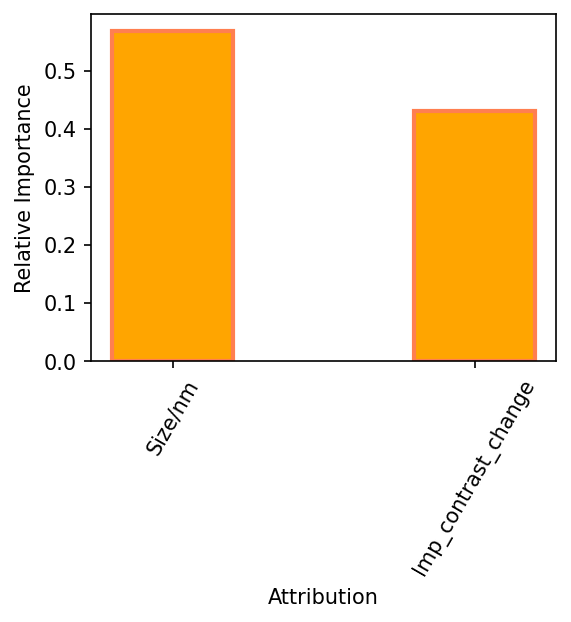

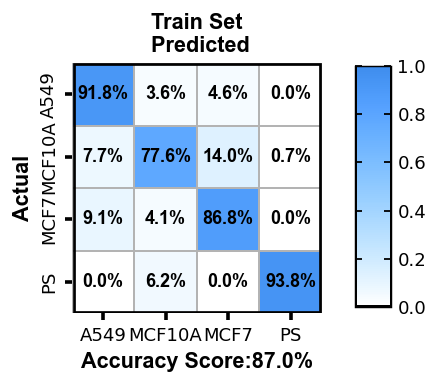

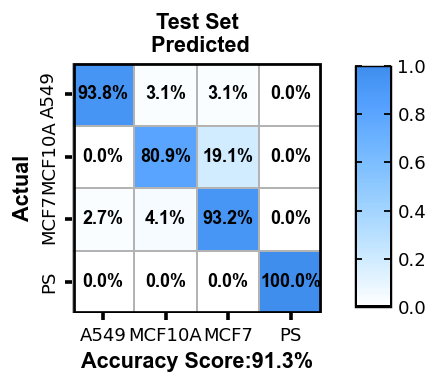

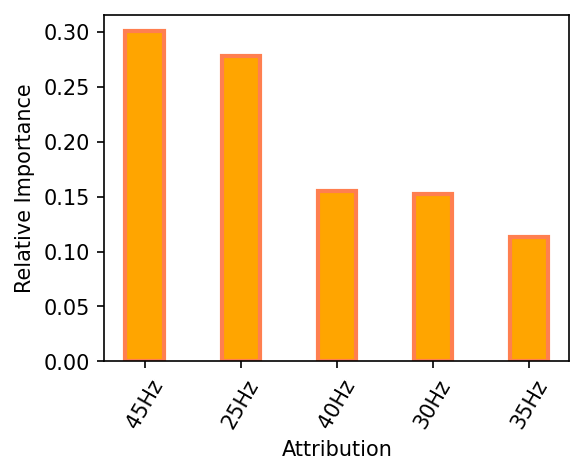

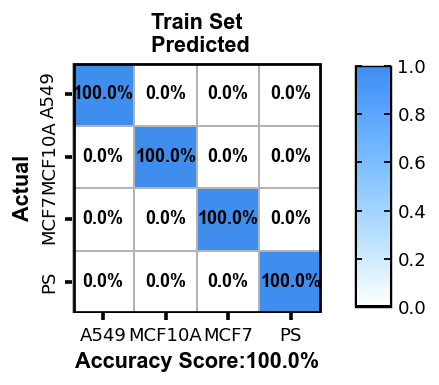

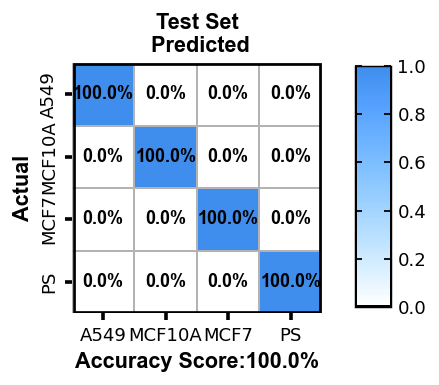

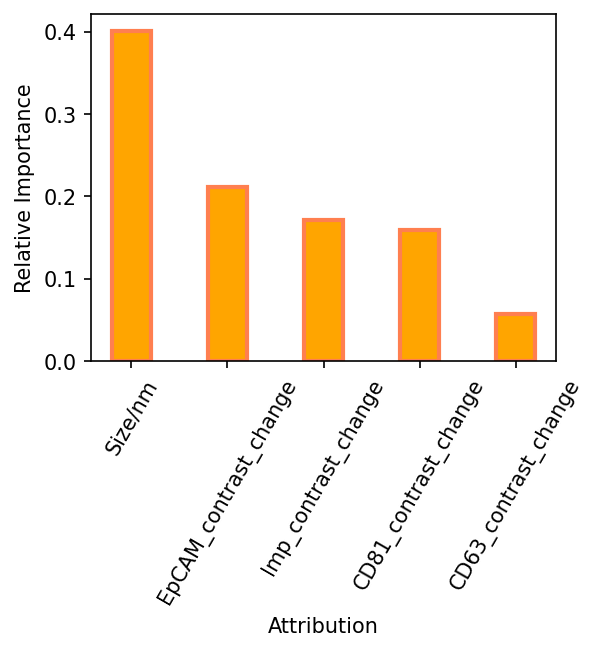

In [407]:
draw_selected_confmat(result, 10, name=['Train Set','Test Set'], impo=True)

# moving_average with DNN

In [1]:
import tensorflow as tf

In [31]:
def create_model(input_shape=(5), output=4, **Dense_config):
    #Dense_config['Dense']: neurons in each layer, eg. [30,20,10]
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape)) #InputLayer, shape(None, 5)
    for neurons in Dense_config['Dense']:
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(output, activation='softmax'))
    return model

In [11]:
df_normalized = MinMaxScaler((0,1)).fit_transform(df_import['size+imp+3Ab'])
df_processed = pd.DataFrame(df_normalized, columns=df_import['size+imp+3Ab'].columns, 
                                        index=df_import['size+imp+3Ab'].index)
data_mov = moving_avg(df_processed, n=10, skip='PS', random_state=42)
data_mov['type_num'] = [type_2_num[i] for i in data_mov['type']]
df_train_x, df_train_y, df_test_x, df_test_y = split_train_test(data_mov, y_col='type_num', split_y=True)

In [43]:
model.get_config()

{'name': 'sequential_7',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 5),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_8'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_14',
    'trainable': True,
    'dtype': 'float32',
    'units': 5,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_15',
    'trainable': True,
    'dtype': 'float32',
    'units': 5,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'confi

In [39]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 5)                 30        
                                                                 
 dense_15 (Dense)            (None, 5)                 30        
                                                                 
 dense_16 (Dense)            (None, 5)                 30        
                                                                 
 dense_17 (Dense)            (None, 4)                 24        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save("my_model.h5") #save as HDF5
model = tf.keras.models.load_model("my_model.h5")

In [104]:
import os
import time
def run_model(model, data_mov, lr=0.001, file_name='layer', root_dir=r'D:\HZC\Imp_ZYX_Deeplearning'):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'], steps_per_execution=10)
    run_id = time.strftime("%Y_%m_%d_%H_%M_%S")
    log_dir = os.path.join(root_dir, run_id+file_name)
    #log_dir = r'D:\HZC\Imp_ZYX_Deeplearning\2024-05-13_avg_3Ab_layer5_5_5_5_lr0.001'
    output_model_file = os.path.join(log_dir, 'best_model.h5')
    
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath=output_model_file, save_best_only=True) #save only when best testset
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=1e-3, restore_best_weights=True) #roll back to bset model
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=2) # Enable histogram computation with each epoch.
    
    df_train_x, df_train_y, df_test_x, df_test_y = split_train_test(data_mov, y_col='type_num', split_y=True)
    history = model.fit(x=df_train_x, y=df_train_y,
                        epochs=4000, verbose=1,
                        validation_data=(df_test_x, df_test_y),
                        callbacks=[tensorboard_callback, checkpoint_cb, early_stopping_cb])
    return history

In [ ]:
from sklearn.preprocessing import MinMaxScaler
type_2_num={'A549':0, 'MCF10A':1, 'MCF7':2, 'PS':3}
def movingavg_with_DNN(data_dict, n_range, skip_mov='PS', skip_norm='5imp', random_state=42):
    accu_train = pd.DataFrame(np.zeros([len(n_range),len(data_dict)]), index = n_range, columns = data_dict.keys())
    loss_train = pd.DataFrame(np.zeros([len(n_range),len(data_dict)]), index = n_range, columns = data_dict.keys())
    accu_test = pd.DataFrame(np.zeros([len(n_range),len(data_dict)]), index = n_range, columns = data_dict.keys()) #accuracy of test set
    loss_test = pd.DataFrame(np.zeros([len(n_range),len(data_dict)]), index = n_range, columns = data_dict.keys()) #loss of test set
    history = {}
    for key in data_dict:
        history_n = []
        if key != skip_norm:
            df_normalized = MinMaxScaler((0,1)).fit_transform(data_dict[key])
            df_processed = pd.DataFrame(df_normalized, columns=data_dict[key].columns, index=data_dict[key].index)
        else:
            df_processed = data_dict[key]
        for n in n_range:
            data_mov = moving_avg(df_processed, n=n, skip=skip_mov, random_state=random_state)
            data_mov['type_num'] = [type_2_num[i] for i in data_mov['type']]
            
            model = create_model(input_shape=(5), output=4, Dense=[5,5,5])
            run_model(model, data_mov)
            clf_result = ML_result(forest_clf, df_train_x, df_train_y, df_test_x, df_test_y)
            result_n += [clf_result]
            accu_train.loc[n, key] = clf_result["accu_train"]
            accu_test.loc[n, key] = clf_result["accu_test"]
        result[key] = result_n
    return result, accu_train, accu_test

In [ ]:
run_model(model, data_mov, lr=0.001, file_name='layer')

train: average of each epoch; test: on the end of each epoch

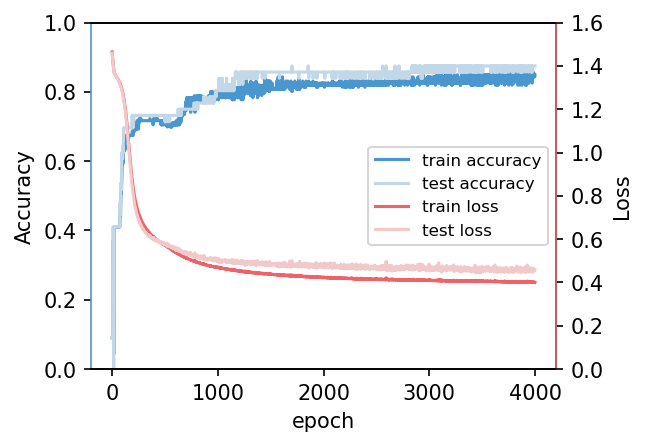

In [103]:
train_hist = pd.DataFrame(history.history)
fig, ax1 = plt.subplots(figsize=(4,3), dpi=150)
cmap=sns.diverging_palette(240, 10, s=80, l=60, sep=20, n=4)
ax1.set_xlabel('epoch')
tr_a, = ax1.plot(train_hist.index, train_hist['accuracy'], color=cmap[0], label='train accuracy')
te_a, = ax1.plot(train_hist.index, train_hist['val_accuracy'], color=cmap[1], label='test accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0,1])
ax1.spines["left"].set_color(cmap[0])

ax2 = ax1.twinx()
tr_l, = ax2.plot(train_hist.index, train_hist['loss'], color=cmap[3], label='train loss')
te_l, = ax2.plot(train_hist.index, train_hist['val_loss'], color=cmap[2], label='test loss')
ax2.set_ylabel('Loss')
ax2.set_ylim([0,1.6])
ax2.spines["right"].set_color(cmap[3])
ax2.spines["left"].set_visible(False)

plt.legend(handles=[tr_a, te_a, tr_l, te_l], loc='center right', fontsize=8)

In [48]:
train_hist

,loss,accuracy,val_loss,val_accuracy
0,1.464388,0.090361,1.458457,0.089286
1,1.456629,0.090361,1.451673,0.089286
2,1.450222,0.090361,1.445311,0.089286
3,1.443479,0.090361,1.439314,0.089286
4,1.437719,0.090361,1.433159,0.089286
...,...,...,...,...
3995,0.401049,0.843373,0.455160,0.875000
3996,0.400740,0.843373,0.455916,0.875000
3997,0.401182,0.843373,0.453978,0.875000
3998,0.400632,0.843373,0.456946,0.875000
